## Analyzing Bitcoin Prices and Stocks (COIN, CRWD, PFE) Amid COVID-19: Negative Correlation Discovery

In [1]:
# Import required libraries for analysis
import pandas as pd 
import requests 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


I will be using an API from CoinGecko to extract the Bitcoin Price for the last 365 Days. Link to API documentation: https://www.coingecko.com/api/documentation

In [2]:
# free api from coingecko, url is straight from their API documentation
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'

# Set Parameters also from API documentation
# I did not use range here because I wanted to specifically have the 365 days. Currency used USD.
params = {
    'vs_currency': 'usd',  # ^^^^
    'days': '365',         # ^^^^
}

try:
    response = requests.get(url, params=params)
    data = response.json()

    # Used GET method, as noted on API documentation
    historical_data = data.get('prices', [])

    # Used Pandas to create a datafrom from the JSON file
    btc_data = pd.DataFrame(historical_data, columns=['timestamp', 'price'])
    btc_data.columns = ['Timestamp', 'Price (USD)'] # Make the column titles cleaner, for clarity(USD)
    print(btc_data)
except Exception as e:
    print(e)


         Timestamp   Price (USD)
0    1667606400000  21150.315584
1    1667692800000  21282.985109
2    1667779200000  20906.997927
3    1667865600000  20597.755017
4    1667952000000  18562.353215
..             ...           ...
361  1698796800000  34672.289284
362  1698883200000  35457.454912
363  1698969600000  34924.055450
364  1699056000000  34731.381369
365  1699058399000  34687.134613

[366 rows x 2 columns]


Data was extracted correctly, I did not use a .shape because the shape extracted in code above. 366 rows x 2 columns. 

The timestamp was formatted in unix epoch so I applied a lambda function & datetime to reformat to my liking

In [3]:
btc_data['Timestamp'] = btc_data['Timestamp'].apply(lambda x: datetime.utcfromtimestamp(x / 1000).strftime('%Y-%m-%d'))
btc_data['Timestamp'] = pd.to_datetime(btc_data['Timestamp'])
btc_data

,Timestamp,Price (USD)
0,2022-11-05,21150.315584
1,2022-11-06,21282.985109
2,2022-11-07,20906.997927
3,2022-11-08,20597.755017
4,2022-11-09,18562.353215
...,...,...
361,2023-11-01,34672.289284
362,2023-11-02,35457.454912
363,2023-11-03,34924.055450
364,2023-11-04,34731.381369


Used .info() to verify the Dtypes

In [4]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    366 non-null    datetime64[ns]
 1   Price (USD)  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


Use .tail() to see the last rows of our data.

In [5]:
btc_data.tail()

,Timestamp,Price (USD)
361,2023-11-01,34672.289284
362,2023-11-02,35457.454912
363,2023-11-03,34924.055450
364,2023-11-04,34731.381369
365,2023-11-04,34687.134613


This part was not super necessary but I noticed an extra row, there was two rows for the date 11-04 so I used truncate method to cut that last row. Row 364 is inclusive. The reason why its not 365 is because index always starts at 0.

In [6]:
btc_data = btc_data.truncate(after=364)

Okay now we are good to go!

In [7]:
btc_data.tail(10)

,Timestamp,Price (USD)
355,2023-10-26,34471.986032
356,2023-10-27,34174.451553
357,2023-10-28,33899.093056
358,2023-10-29,34092.630933
359,2023-10-30,34556.242815
360,2023-10-31,34498.703919
361,2023-11-01,34672.289284
362,2023-11-02,35457.454912
363,2023-11-03,34924.055450
364,2023-11-04,34731.381369


Used a simple lineplot to visualize this timeseries data.

<Axes: xlabel='Timestamp'>

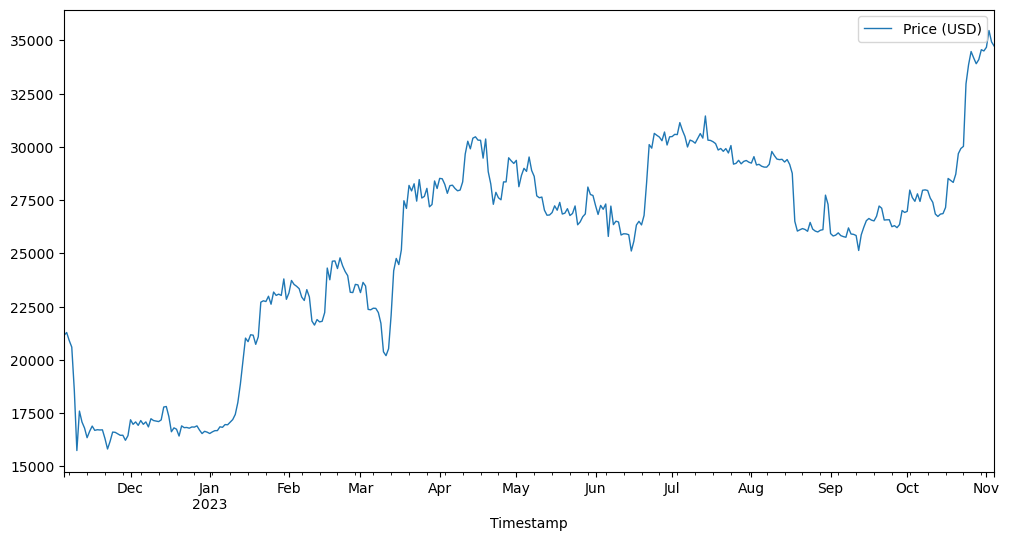

In [8]:
btc_data.plot.line(x='Timestamp', y='Price (USD)', figsize=(12,6), lw=1)

<span style="color:blue">

**Bitcoin has demonstrated a sustained uptrend since November of the previous year, as illustrated by the consistent upward movement in the line plot.**

</span>

In [9]:
btc_data.to_csv('btc_data.csv', index=True)

Utilized another API from alpha advantage to extract real time stock market data. Link to API documentation: https://www.alphavantage.co/documentation/

The first stock that we will be analysing is **CRWD**. **CrowdStrike Holdings, Inc.** is a cybersecurity company known for its cloud-based endpoint protection platform, offering advanced threat detection and response solutions to protect organizations from cyber threats. With a strong market presence and a reputation for cutting-edge security technology, CRWD has shown consistent growth in the cybersecurity sector. The reason that I choose this stock is that it is a reputable tech stock, that would be an interesting pick, to analyse with BTC.

In [10]:
# URL extracted from API documentation, tweaked function to 'Time series daily' & output to full, to grab all historical data
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CRWD&outputsize=full&apikey=9P4QWO'
r = requests.get(url) # Get method to get data
data = r.json() 

Created a dictionary with data, calling it Timeseries

In [11]:
time_series = data['Time Series (Daily)'] # I wanted to see if the date was key to values

Using pd.DataFrame created dataframe from dictionary from above

In [12]:
crwd_data = pd.DataFrame.from_dict(time_series, orient='index') # Make the keys my index which are the dates
crwd_data.index = pd.to_datetime(crwd_data.index) # convert those dates into datetime
crwd_data = crwd_data.reset_index() # allows the date index to become a column now
crwd_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'] 
crwd_data.sort_values(by='Date', ascending=True, inplace=True)

.shape to see the dimensions of my dataframe

In [13]:
crwd_data.shape

(1109, 6)

.info() to verify my dtypes

In [14]:
crwd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1109 entries, 1108 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1109 non-null   datetime64[ns]
 1   Open    1109 non-null   object        
 2   High    1109 non-null   object        
 3   Low     1109 non-null   object        
 4   Close   1109 non-null   object        
 5   Volume  1109 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 60.6+ KB


Dtypes in columns except for date should be numeric but first, I dont need the columns Open, High, Low & Volume for my analysis. Only the 'Close" is relevant

In [15]:
crwd_data = crwd_data.drop(columns=(['Open', 'High','Low','Volume'])) # drop the unwanted columns
crwd_data['Close'] = crwd_data['Close'].astype(float) #.astype to change from obj to float
crwd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1109 entries, 1108 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1109 non-null   datetime64[ns]
 1   Close   1109 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.0 KB


Looks good to go!

I only wanted a certain timeframe so I used a conditional to find dates after my condition.

In [16]:
start_date = pd.to_datetime('2022-11-02')
crwd_data  = crwd_data[crwd_data['Date'] > start_date]
crwd_data

,Date,Close
251,2022-11-03,141.53
250,2022-11-04,127.56
249,2022-11-07,124.68
248,2022-11-08,127.00
247,2022-11-09,122.36
...,...,...
4,2023-10-30,174.61
3,2023-10-31,176.77
2,2023-11-01,178.35
1,2023-11-02,182.80


Time to plot my graph! Using a lineplot to visualize the stock over time

<Axes: xlabel='Date'>

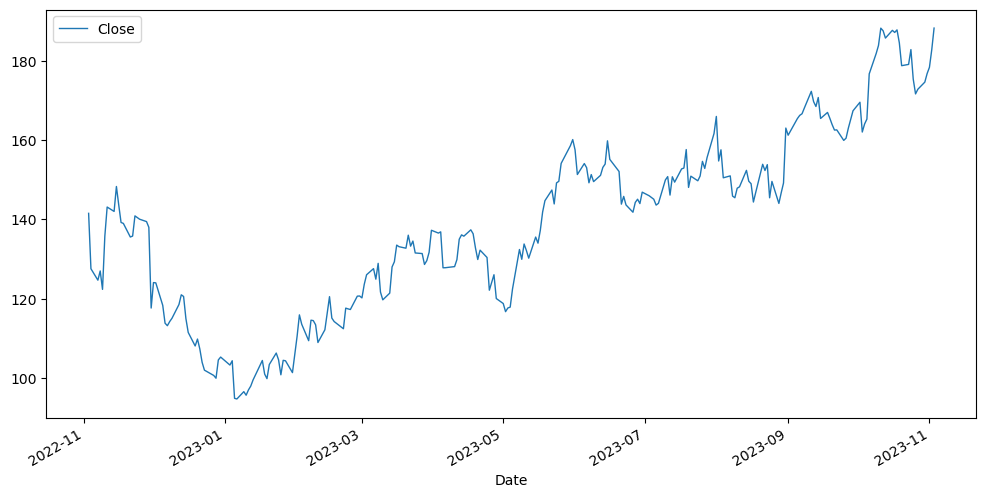

In [17]:
crwd_data.plot.line(x='Date', y='Close', figsize=(12,6), lw=1)

<span style="color:blue">

**CRWD has demonstrated a sustained uptrend since November of the previous year, as illustrated by the consistent upward movement in the line plot.**

</span>

Utilized same API from Alpha Advantage to extract real time stock market data. Link to API documentation: https://www.alphavantage.co/documentation/

The second stock we will be analysing is COIN. **Coinbase Global, Inc.** is a leading cryptocurrency exchange platform that went public in April 2021, providing a gateway for users to buy, sell, and trade various cryptocurrencies. The stock's performance is closely tied to the dynamics of the cryptocurrency market, making it subject to significant volatility.The reason I chose this stock is because this is the same domain as Bitcoin, should positively correlate with are price of Bitcoin

In [18]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=COIN&outputsize=full&apikey=9P4QW'
r = requests.get(url)
data = r.json()

**NOTE WILL BE USING SAME METHOD AS ABOVE TO TRANSFORM AND CLEAN DATA TO MY LIKING FOR MY ANALYSIS**

In [19]:
time_series = data['Time Series (Daily)']

In [20]:
coin_data = pd.DataFrame.from_dict(time_series, orient='index')
coin_data.index = pd.to_datetime(coin_data.index)
coin_data = coin_data.reset_index()
coin_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
coin_data.sort_values(by='Date', ascending=True, inplace=True)

<Axes: xlabel='Date'>

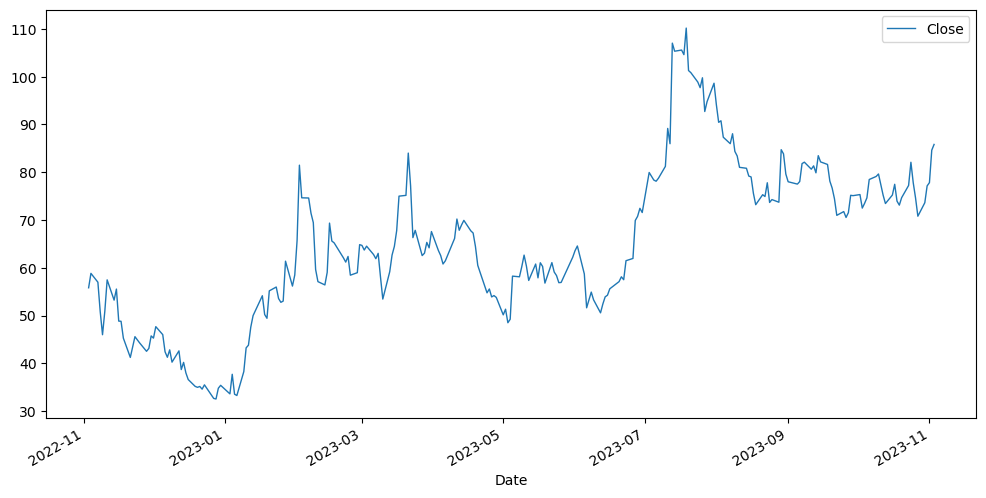

In [21]:
coin_data = coin_data.drop(columns=(['Open', 'High','Low','Volume']))
coin_data['Close'] = coin_data['Close'].astype(float)
start_date = pd.to_datetime('2022-11-02')
coin_data  = coin_data[coin_data['Date'] > start_date]

coin_data.plot.line(x='Date', y='Close', figsize=(12,6), lw=1)

<span style="color:blue">

**Coinbase has demonstrated a sustained uptrend but volatile tendency since November of the previous year, as illustrated by the consistent upward but volatile movement in the line plot.**

</span>

Utilized same API from Alpha Advantage to extract real time stock market data. Link to API documentation: https://www.alphavantage.co/documentation/

The last stock we will analyse is **PFE**. **Pfizer Inc.** is a pharmaceutical company that gained significant attention due to its role in developing and distributing COVID-19 vaccines. As a key player in the global vaccination effort, PFE's stock performance has been influenced by its COVID-19 vaccine initiatives and related developments.

In [22]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=PFE&outputsize=full&apikey=9P4QW'
r = requests.get(url)
data = r.json()

**NOTE WILL BE USING SAME METHOD AS ABOVE TO TRANSFORM AND CLEAN DATA TO MY LIKING FOR MY ANALYSIS**

*This code is just combined into one, instead of multiple line code, please refer to data manipulation and wrangling in CRWD api data*

<Axes: xlabel='Date'>

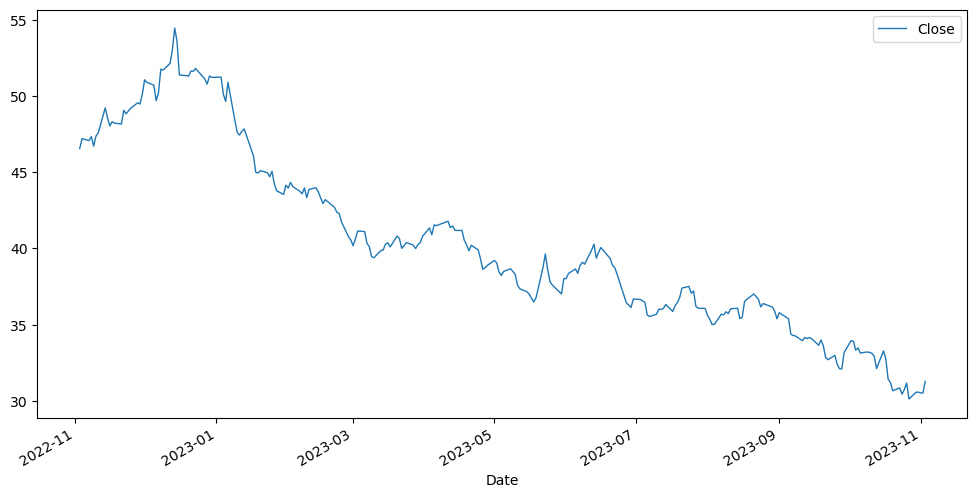

In [23]:
time_series = data['Time Series (Daily)']
pfe_data = pd.DataFrame.from_dict(time_series, orient='index')
pfe_data.index = pd.to_datetime(pfe_data.index)
pfe_data = pfe_data.reset_index()
pfe_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
pfe_data.sort_values(by='Date', ascending=True, inplace=True)
pfe_data = pfe_data.drop(columns=(['Open', 'High','Low','Volume']))
pfe_data['Close'] = pfe_data['Close'].astype(float)
start_date = pd.to_datetime('2022-11-02')
pfe_data  = pfe_data[pfe_data['Date'] > start_date]

pfe_data.plot.line(x='Date', y='Close', figsize=(12,6), lw=1)

<span style="color:blue">

**PFE has demonstrated a persistent downward trend since November of the previous year, as evidenced by the line plot above.**

</span>

Now to merge all the data together to compare these 4 assets and define some correlations or trends.

In [24]:
merged_data = pd.merge(pfe_data, coin_data, how='inner', on='Date',suffixes=['_Pfe','_Coin']) # suffixes to define the column with associated stock
merged_data = pd.merge(merged_data, crwd_data, how='inner', on='Date') #second merge to get CRWD data
merged_data = pd.merge(merged_data, btc_data, how='inner', left_on='Date', right_on='Timestamp') # last merge to get btc data
merged_data

,Date,Close_Pfe,Close_Coin,Close,Timestamp,Price (USD)
0,2022-11-07,47.09,56.97,124.68,2022-11-07,20906.997927
1,2022-11-08,47.35,50.83,127.00,2022-11-08,20597.755017
2,2022-11-09,46.72,45.98,122.36,2022-11-09,18562.353215
3,2022-11-10,47.38,50.92,135.76,2022-11-10,15742.444336
4,2022-11-11,47.60,57.46,143.12,2022-11-11,17594.923500
...,...,...,...,...,...,...
245,2023-10-30,30.55,73.60,174.61,2023-10-30,34556.242815
246,2023-10-31,30.56,77.12,176.77,2023-10-31,34498.703919
247,2023-11-01,30.51,77.81,178.35,2023-11-01,34672.289284
248,2023-11-02,30.50,84.60,182.80,2023-11-02,35457.454912


Next step to clean up data and drop the columns we wont use, for example two date columns let get rid of one.

In [25]:
merged_data = merged_data.drop(columns='Timestamp')
merged_data = merged_data.rename(columns={'Close':'Close_Crwd', 'Price (USD)':'Close_Btc'}) # Rename to get clarity on which price is which
merged_data

,Date,Close_Pfe,Close_Coin,Close_Crwd,Close_Btc
0,2022-11-07,47.09,56.97,124.68,20906.997927
1,2022-11-08,47.35,50.83,127.00,20597.755017
2,2022-11-09,46.72,45.98,122.36,18562.353215
3,2022-11-10,47.38,50.92,135.76,15742.444336
4,2022-11-11,47.60,57.46,143.12,17594.923500
...,...,...,...,...,...
245,2023-10-30,30.55,73.60,174.61,34556.242815
246,2023-10-31,30.56,77.12,176.77,34498.703919
247,2023-11-01,30.51,77.81,178.35,34672.289284
248,2023-11-02,30.50,84.60,182.80,35457.454912


Time to find some correlation! Used .corr() to help my findings

In [26]:
merged_data.set_index('Date', inplace=True)
merged_data.corr()

,Close_Pfe,Close_Coin,Close_Crwd,Close_Btc
Close_Pfe,1.000000,-0.774190,-0.806878,-0.871776
Close_Coin,-0.774190,1.000000,0.652490,0.743034
Close_Crwd,-0.806878,0.652490,1.000000,0.623411
Close_Btc,-0.871776,0.743034,0.623411,1.000000


Visualizing the data using Seaborns heatmap

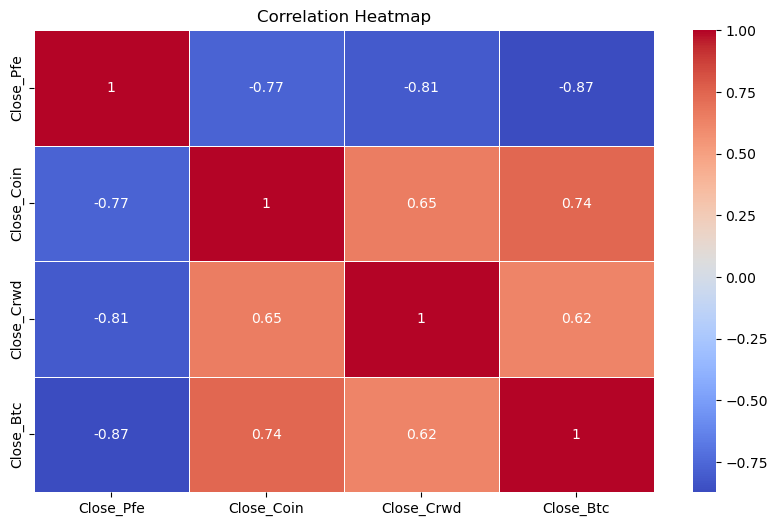

In [27]:
correlation_matrix = merged_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

<span style="color:blue">

**The provided  Seaborn heatmap illustrates the correlations between the closing prices of PFE, COIN, CRWD, and BTC. PFE shows strong negative correlations with both COIN and BTC, implying that as PFE prices decline, COIN and BTC prices tend to rise, and vice versa. PFE also exhibits a negative correlation with CRWD. In contrast, COIN demonstrates positive correlations with CRWD and BTC, while CRWD and BTC have a moderate positive correlation.**

</span>

In [28]:
max_prices = merged_data[['Close_Btc', 'Close_Coin', 'Close_Crwd', 'Close_Pfe']].idxmax()
max_prices


Close_Btc    2023-11-02
Close_Coin   2023-07-19
Close_Crwd   2023-11-03
Close_Pfe    2022-12-14
dtype: datetime64[ns]

<span style="color:blue">

**The all time highs for the year for BTC, COIN & CRWD are all reached within a 4 month timeframe. A noteworthy point is that CRWD and BTC experienced their peak values with just one day's difference, indicating potential synchronized market movements. PFE experienced its all time high for the last year in 2022, which is when Covid was still highly relevant, indicating a potential covid correlation.**

</span>

In [29]:
min_prices = merged_data[['Close_Btc', 'Close_Coin', 'Close_Crwd', 'Close_Pfe']].idxmin()
min_prices

Close_Btc    2022-11-10
Close_Coin   2022-12-28
Close_Crwd   2023-01-06
Close_Pfe    2023-10-27
dtype: datetime64[ns]

<span style="color:blue">

**A complete opposite for the all time lows for the last 365 days indicating a trend with these tech stocks and Bitcoin. Negative with PFE**

</span>

Now its time to Visualize this data. The problem was that Bitcoin had a significally different pricepoint from the stocks so I had to utilize the Min-Max normalization to visualize this data correctly.

"*The Min-Max normalization method scales data to a specific range, typically between 0 and 1, by subtracting the minimum value from each data point and dividing by the range. This technique is useful for ensuring that all data points fall within the same standardized interval, making it easier to compare and analyze variables with different scales*."

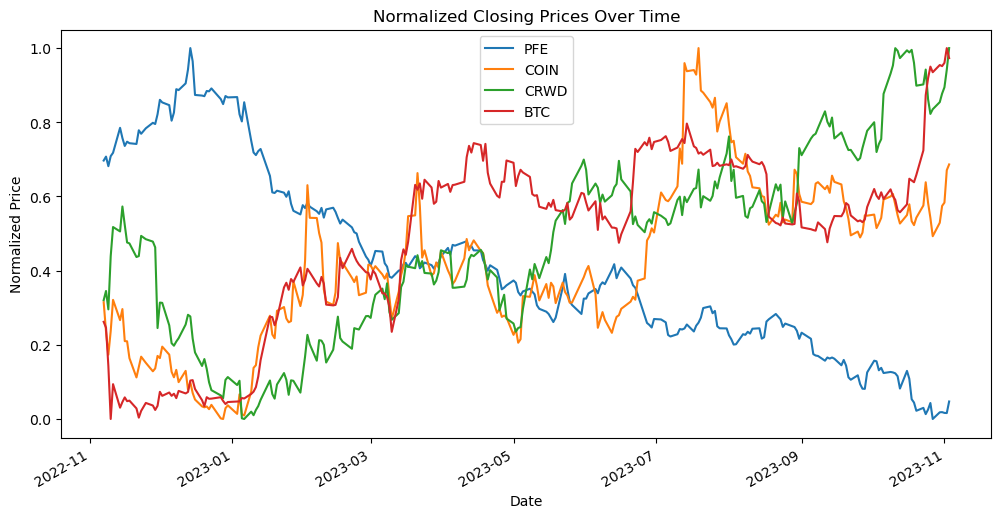

In [30]:
merged_data['Close_Pfe_normalized'] = (merged_data['Close_Pfe'] - merged_data['Close_Pfe'].min()) / (merged_data['Close_Pfe'].max() - merged_data['Close_Pfe'].min())
merged_data['Close_Coin_normalized'] = (merged_data['Close_Coin'] - merged_data['Close_Coin'].min()) / (merged_data['Close_Coin'].max() - merged_data['Close_Coin'].min())
merged_data['Close_Crwd_normalized'] = (merged_data['Close_Crwd'] - merged_data['Close_Crwd'].min()) / (merged_data['Close_Crwd'].max() - merged_data['Close_Crwd'].min())
merged_data['Close_Btc_normalized'] = (merged_data['Close_Btc'] - merged_data['Close_Btc'].min()) / (merged_data['Close_Btc'].max() - merged_data['Close_Btc'].min())

merged_data[['Close_Pfe_normalized', 'Close_Coin_normalized', 'Close_Crwd_normalized', 'Close_Btc_normalized']].plot(figsize=(12, 6))
plt.title('Normalized Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(['PFE', 'COIN', 'CRWD', 'BTC'])  
plt.show()

<span style="color:blue">

**As previously shown in our single line plots above, now it is time to merge the plots together to visualize the trends that BTC, COIN, & CRWD are showing. The line plot reveals that Bitcoin, Coinbase, and CrowdStrike have all shown a sustained uptrend since November of the previous year, signifying consistent price increases. In contrast, Pfizer has displayed a clear and continuous downtrend over the same period, indicating a persistent decrease in its stock price.**

</span>

Regression plots to visualise the correlation with Bitcoin.

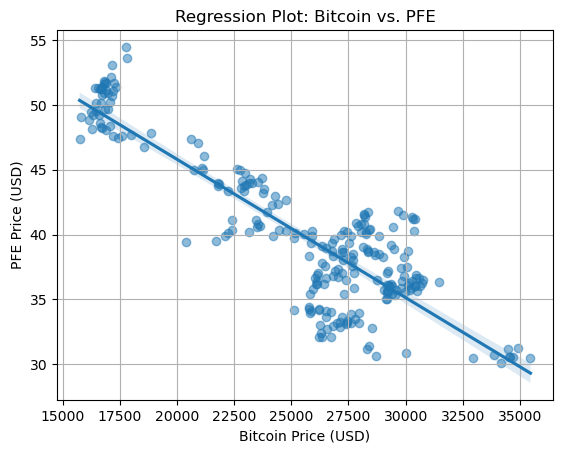

In [31]:
sns.regplot(data=merged_data, x='Close_Btc', y='Close_Pfe', scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Bitcoin vs. PFE')
plt.xlabel('Bitcoin Price (USD)')
plt.ylabel('PFE Price (USD)')
plt.grid(True)
plt.show()

<span style="color:blue">

**The regression plot illustrates a negative downtrend between Bitcoin and Pfizer. As Bitcoin prices increase, PFE's stock prices consistently decline, indicating an inverse relationship between these two assets**

</span>

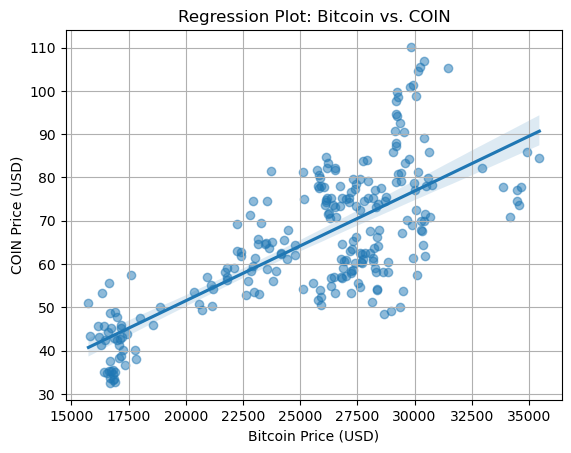

In [32]:
sns.regplot(data=merged_data, x='Close_Btc', y='Close_Coin', scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Bitcoin vs. COIN')
plt.xlabel('Bitcoin Price (USD)')
plt.ylabel('COIN Price (USD)')
plt.grid(True)
plt.show()

<span style="color:blue">

**The regression plot demonstrates a positive trend between Coinbase and Bitcoin, indicating that as Bitcoin prices increase, COIN's stock prices tend to rise as well. This positive correlation suggests a relationship where the two assets move in the same direction.**

</span>

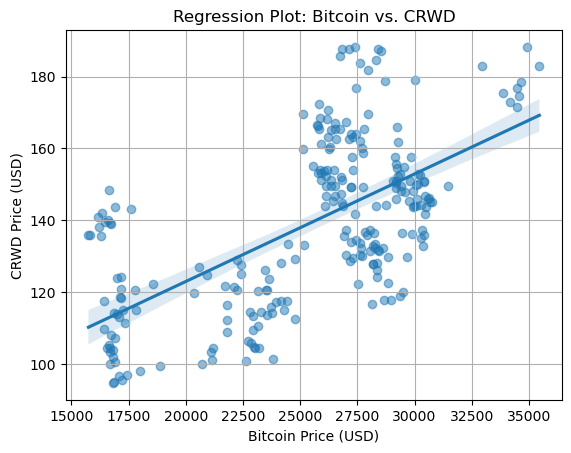

In [33]:
sns.regplot(data=merged_data, x='Close_Btc', y='Close_Crwd', scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Bitcoin vs. CRWD')
plt.xlabel('Bitcoin Price (USD)')
plt.ylabel('CRWD Price (USD)')
plt.grid(True)
plt.show()

<span style="color:blue">

**The regression plot demonstrates a positive trend between CRWD and Bitcoin, indicating that as Bitcoin prices increase, CRWD's stock prices tend to rise as well. This positive correlation suggests a relationship where the two assets move in the same direction.**

</span>

Now I was a little curious and just wanted to verify that CRWD and COIN also have a strong relationship. 

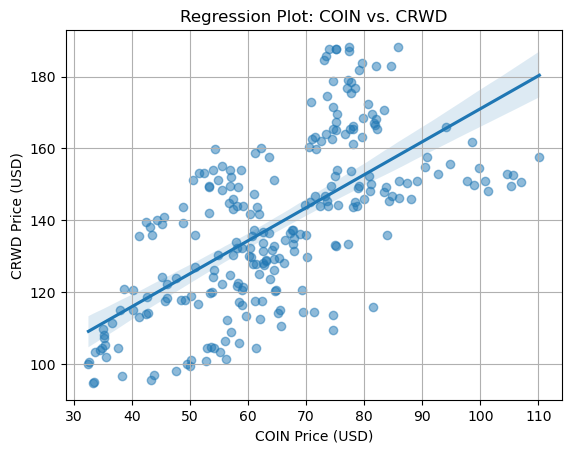

In [34]:
sns.regplot(data=merged_data, x='Close_Coin', y='Close_Crwd', scatter_kws={'alpha':0.5})
plt.title('Regression Plot: COIN vs. CRWD')
plt.xlabel('COIN Price (USD)')
plt.ylabel('CRWD Price (USD)')
plt.grid(True)
plt.show()

In [35]:
merged_data.to_csv('merged_all_asset_data.csv', index=True)

## My next step was to further my investigation into Covid 19 and Bitcoin. 

My goal is to use the weekly hospital visits related to covid, use the # of visits to find a trend/correlation with price of Bitcoin.

This data was extracted from the CDC website. Link here: https://covid.cdc.gov/covid-data-tracker/#trends_weeklyhospitaladmissions_select_00

In [36]:
covid_hospital_visits = pd.read_csv('covid_hospital_visits.csv', header=0) ## pd.read_csv to get import file
covid_hospital_visits.head()

,Geography,Date,Amount of Hospital Visits
0,United States,Oct 28 2023,15745.0
1,United States,Oct 21 2023,15722.0
2,United States,Oct 14 2023,15958.0
3,United States,Oct 7 2023,17035.0
4,United States,Sep 30 2023,18279.0


In [37]:
covid_hospital_visits.shape

(199, 3)

.info() to check my dtypes

In [38]:
covid_hospital_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Geography                  199 non-null    object 
 1   Date                       199 non-null    object 
 2   Amount of Hospital Visits  169 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


Noticed that my Date is not in datetime format.

In [39]:
covid_hospital_visits['Date'] = pd.to_datetime(covid_hospital_visits['Date'], format='%b %d %Y') # Converted to datetime format using same as BTC 
covid_hospital_visits.head()

,Geography,Date,Amount of Hospital Visits
0,United States,2023-10-28,15745.0
1,United States,2023-10-21,15722.0
2,United States,2023-10-14,15958.0
3,United States,2023-10-07,17035.0
4,United States,2023-09-30,18279.0


In [40]:
covid_hospital_visits.rename(columns={'Geography':'Location',
                            'Amount of Hospital Visits':'Visits_Per_Week'}, inplace=True) # Renamed Columns for more clarity
covid_hospital_visits.head()

,Location,Date,Visits_Per_Week
0,United States,2023-10-28,15745.0
1,United States,2023-10-21,15722.0
2,United States,2023-10-14,15958.0
3,United States,2023-10-07,17035.0
4,United States,2023-09-30,18279.0


Time to Visualize my data using a Lineplot

<Axes: xlabel='Date'>

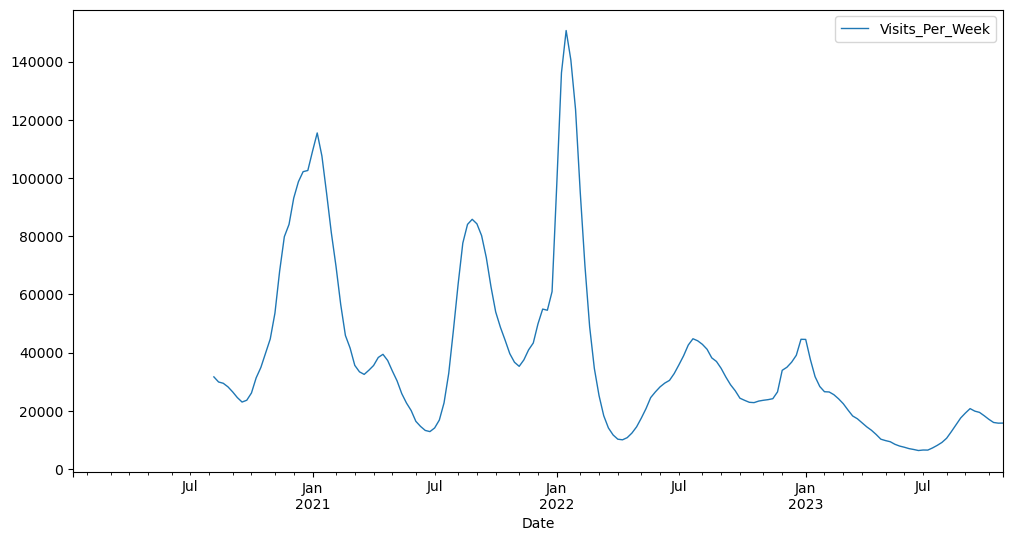

In [41]:
covid_hospital_visits.plot.line(x='Date' , y='Visits_Per_Week', figsize=(12,6), lw=1)

<span style="color:blue">

**The line plot reveals a notable spike in hospital visits in January 2022, suggesting a significant surge in COVID-19 cases during that period. Following this spike, the data presents a fluctuating pattern resembling a roller coaster, indicating varying levels of hospital visits and potential shifts in the pandemic's impact over time**

</span>

Used a conditional operator to filter out for dates only after 2022-10-22

In [42]:
covid_hospital_visits = covid_hospital_visits[covid_hospital_visits['Date'] > '2022-10-22']
covid_hospital_visits.tail()

,Location,Date,Visits_Per_Week
48,United States,2022-11-26,26461.0
49,United States,2022-11-19,24132.0
50,United States,2022-11-12,23803.0
51,United States,2022-11-05,23590.0
52,United States,2022-10-29,23311.0


In [43]:
covid_hospital_visits.set_index('Date', inplace=True) # set index to date
covid_hospital_visits.head()


,Location,Visits_Per_Week
Date,,
2023-10-28,United States,15745.0
2023-10-21,United States,15722.0
2023-10-14,United States,15958.0
2023-10-07,United States,17035.0
2023-09-30,United States,18279.0


In [44]:
covid_hospital_visits.drop(columns='Location', inplace=True) #did not need the location for this analysis we know its the US
covid_hospital_visits.head()

C:\Users\Marcr\AppData\Local\Temp\ipykernel_6416\3342644746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_hospital_visits.drop(columns='Location', inplace=True) #did not need the location for this analysis we know its the US


,Visits_Per_Week
Date,
2023-10-28,15745.0
2023-10-21,15722.0
2023-10-14,15958.0
2023-10-07,17035.0
2023-09-30,18279.0


Now it is time to format my original Bitcoin Data, I utilized the resample method to 'W'(weekly) and grabbed the average to match up with the weekly covid visits.

In [45]:
btc_data['Timestamp'] = pd.to_datetime(btc_data['Timestamp'])
btc_data.set_index('Timestamp', inplace=True)
weekly_btc_data = btc_data['Price (USD)'].resample('W').mean()
weekly_btc_data = weekly_btc_data.reset_index()
weekly_btc_data.head()

,Timestamp,Price (USD)
0,2022-11-06,21216.650347
1,2022-11-13,18183.239534
2,2022-11-20,16672.601495
3,2022-11-27,16353.527418
4,2022-12-04,16755.833299


Utilized  pd.merge to combine my data, I had to reset the index in the covid hospital visits because I wanted the date back as a column so I am able to merge the btc data with the covid data on the date.

In [46]:
covid_hospital_visits.reset_index(inplace=True)
covid_hospital_visits.tail()
covid_btc_data = pd.merge(btc_data, covid_hospital_visits, how='inner', left_on='Timestamp', right_on='Date')
covid_btc_data.rename(columns={'Price (USD)':'Btc_Price_Wkly'}, inplace=True) #renamed for clarity and make aware that this is weekly
covid_btc_data.head()


,Btc_Price_Wkly,Date,Visits_Per_Week
0,21150.315584,2022-11-05,23590.0
1,17080.215261,2022-11-12,23803.0
2,16707.022779,2022-11-19,24132.0
3,16524.449008,2022-11-26,26461.0
4,17084.873340,2022-12-03,33883.0


Okay looks good! Now its time to visualize this data

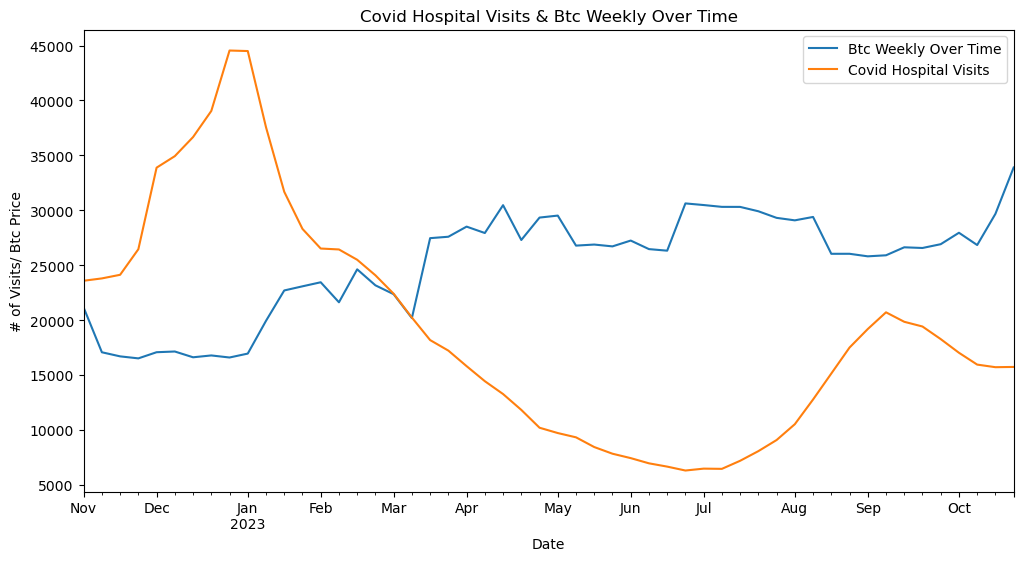

In [47]:
covid_btc_data.set_index('Date', inplace=True)
covid_btc_data[['Btc_Price_Wkly', 'Visits_Per_Week']].plot(figsize=(12, 6))
plt.title('Covid Hospital Visits & Btc Weekly Over Time')
plt.xlabel('Date')
plt.ylabel('# of Visits/ Btc Price')
plt.legend(['Btc Weekly Over Time', 'Covid Hospital Visits' ])
plt.show()

<span style="color:blue">

**This chart appears to reveal no clear correlation between hospital visits and Bitcoin price trends, whether in the form of uptrends or downtrends. One notable observation is a subtle downtrend in hospital visits during October, coinciding with a sudden and significant upsurge in Bitcoin prices. A non related finding is that during the summer months the visits decrease substantially.**

</span>

In [48]:
covid_btc_data.corr()

,Btc_Price_Wkly,Visits_Per_Week
Btc_Price_Wkly,1.00000,-0.84201
Visits_Per_Week,-0.84201,1.00000


<span style="color:blue">

**Strong negative correlation betqeen btc and visits.**

</span>

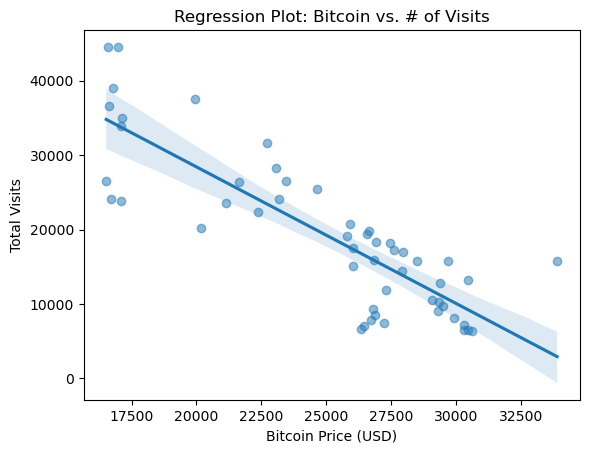

In [49]:
sns.regplot(data=covid_btc_data, x='Btc_Price_Wkly', y='Visits_Per_Week', scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Bitcoin vs. # of Visits')
plt.xlabel('Bitcoin Price (USD)')
plt.ylabel('Total Visits')
plt.show()

<span style="color:blue">

**My analysis revealed negative correlations between Bitcoin and both PFE and hospital visits related to covid. When Bitcoin prices increased, the stock price of PFE and visits to the hospital related to covid decreased, indicating an inverse relationship between these assets. Our analysis has shed light on the complex relationship between Bitcoin and selected stocks during the COVID-19 pandemic. Although this analysis does not go really deep into the reason why bitcoin has an inverse relationship with PFE and visits, it allows us to further investigate into this relationship.**

</span>

Extract final data set for future use

In [50]:
covid_btc_data.to_csv('covid_btc_data.csv', index=True)